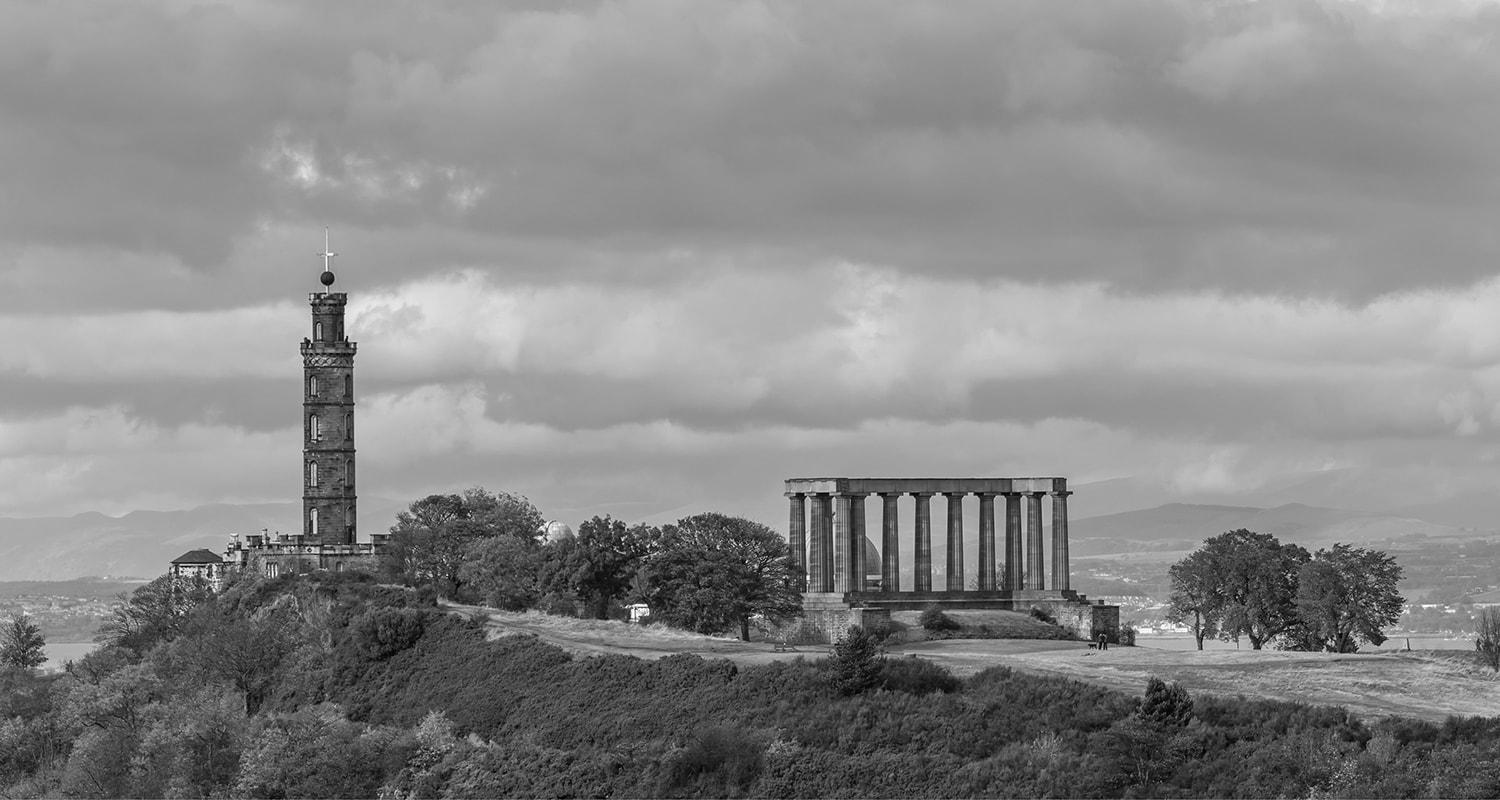

In [1]:
import numpy as np
import cv2
from PIL import Image

img = cv2.imread('monument.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Image.fromarray(img)

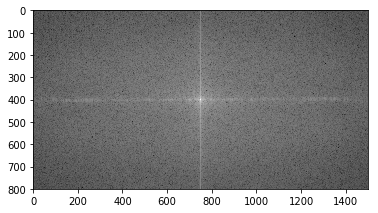

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

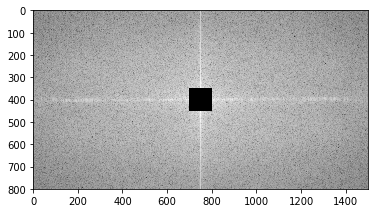

In [32]:
yc, xc = img.shape
magnitude_spectrum[yc//2-50:yc//2+50, xc//2-50:xc//2+50] = 0
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

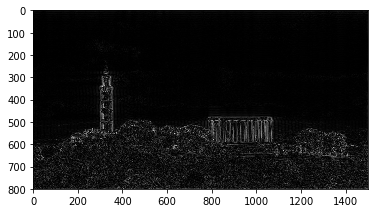

In [23]:
## High Pass filter

fshift[yc//2-50:yc//2+50, xc//2-50:xc//2+50] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap='gray')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


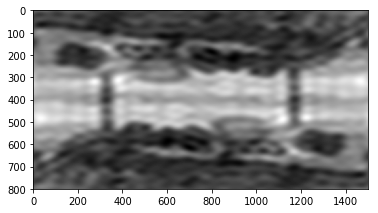

In [3]:
## Low pass filter
yc, xc = img.shape
ff = np.zeros(img.shape)
ff[yc//2-20:yc//2+20, xc//2-20:xc//2+20] = fshift[yc//2-20:yc//2+20, xc//2-20:xc//2+20]
f_ishift = np.fft.ifftshift(ff)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap='gray')
plt.show()